This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions on Mondays 30.1, 13.2 (after lecture) and Thursday 2.3 (at lecture)

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [118]:
#import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
#print ("The id code is: ",end="")
#print (uuid.uuid1())

# Introduction (1 p)

Write an introductory chapter for your report
<br>
- Explain what is the purpose of this task?
- Describe, what kind of data were used? Where did it originate? Give correct reference.
- Which methods did you use?
- Describe shortly the results

In this report, images of three different rice grains are classified using machine learning methods. This task is done to get hands-on experience in data analysis.

The original dataset contains 75,000 images of five different rice strains, 15,000 images for each strain. The original dataset is from a study *Identification of rice varieties using machine learning algorithms* by Cinar & Koklu (2022). Only Arborio, Basmati and Jasmine are considered and a sample of 300 images, 100 for each strain, is used in this task, instead of the whole original dataset.

The performance of three different machine learning algorithms are evaluated with K-fold repeated cross validation. The algorithms are K nearest neighbors, random forest and multilayer perceptron.

Random forest had the highest accuracy of 98.3%. Second best model was K nearest neighbors with an accuracy of 96.7%. Multilayer perceptron had an accuracy of 83.7%.



# Part 2

Data exploration and model selection

# Part 3

In [128]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

## Performance estimation (2 p)

Use the previously gathered data (again, use the standardized features). <br>
Estimate the performance of each model using nested cross validation. Use 10-fold cross validation for outer and <br>
5-fold repeated cross validation with 3 repetitions for inner loop.  <br> 
Select the best model in the inner loop using the hyperparameter combinations and ranges defined in the Part 2. <br>
For each model, calculate the accuracy and the confusion matrix. <br> 
Which hyperparameter/hyperparameter combination is most often chosen as the best one for each classifier? 

In [120]:
# Load the data
data = pd.read_csv('../training_data/rice_data.csv', header=0)
feature_names = list(data.columns[2:])

In [121]:
# Scale the data
std_scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[feature_names] = std_scaler.fit_transform(data_scaled[feature_names])

In [122]:
# Nested cross validation
# 10-fold CV for outer loop
# 3 repetitions of 5-fold CV in inner loop 
def perf_est(features, labels, model, params):
    # Define cross validation folds
    outer_cv = KFold(n_splits=10)
    inner_cv = RepeatedKFold(n_splits=5, n_repeats=3)

    # Nested CV
    gscv = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv, n_jobs=-1)
    gscv.fit(X=features.values, y=labels.values)
    cval = cross_validate(gscv, X=features.values, y=labels.values, scoring='accuracy', cv=outer_cv, return_estimator=True)
    cv_score = cval['test_score']
    cv_estim = cval['estimator']

    # Get most most frequently used parameter combination
    used_params = []
    for est in cv_estim:
        used_params.append(str(list(est.best_params_.values())))
    unique, counts = np.unique(used_params, return_counts=True)
    most_used_param = unique[np.argmax(counts)]


    # Predictions for the confusion matrix
    pred = cross_val_predict(estimator=gscv, X=features.values, y=labels.values, cv=outer_cv)
    ConfusionMatrixDisplay.from_predictions(y_true=labels, y_pred=pred, cmap='Blues')

    plt.title(f'Confusion matrix for {model}')
    print(f'Most used hyperparameter combination for {model} is {most_used_param}')
    print(f'Accuracy for {model} is { np.mean(cv_score):.4f}')

Most used hyperparameter combination for KNeighborsClassifier() is [4]
Accuracy for KNeighborsClassifier() is 0.9667


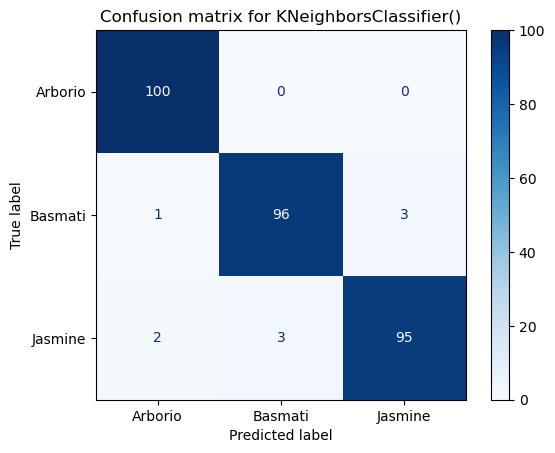

In [123]:
k_range = np.arange(3,16)
perf_est(data_scaled[feature_names], data_scaled['label'], KNeighborsClassifier(), {'n_neighbors' : k_range})

Most used hyperparameter combination for RandomForestClassifier() is [5, 7]
Accuracy for RandomForestClassifier() is 0.9833


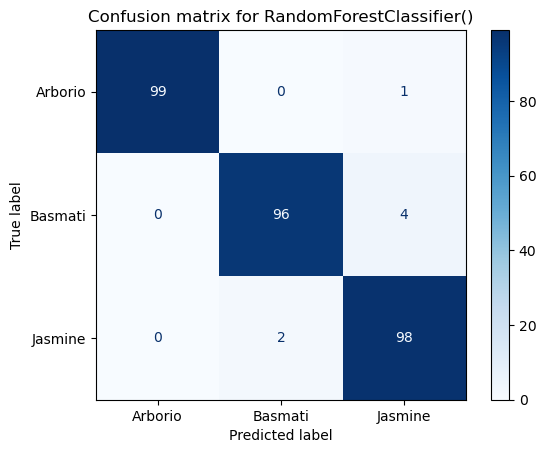

In [124]:
rf_params = {'max_depth': np.arange(3, 6), 'max_features' : np.arange(4,22, step=3)}
perf_est(data_scaled[feature_names], data_scaled['label'], RandomForestClassifier(), rf_params)

Most used hyperparameter combination for MLPClassifier(early_stopping=True, max_iter=500, random_state=876) is ['relu', (13,), 'sgd', 0.5]
Accuracy for MLPClassifier(early_stopping=True, max_iter=500, random_state=876) is 0.8367


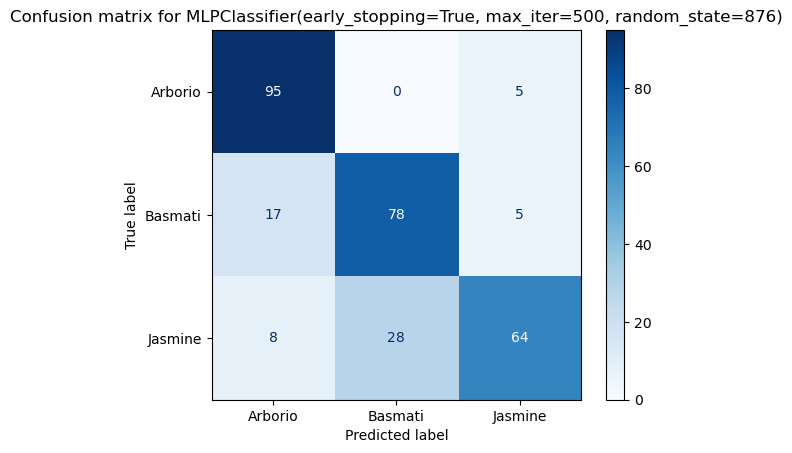

In [127]:
mlp_params = {
    'hidden_layer_sizes': [(i,) for i in range(8,22)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'validation_fraction': [0.1, 0.5]
}
perf_est(data_scaled[feature_names], data_scaled['label'], MLPClassifier(max_iter=500, early_stopping=True, random_state=876), mlp_params)

## Discussion (2 p)

Discuss you results

- Which model performs the best? Why?
- Ponder the limitations and generalization of the models. How well will the classifiers perform for data outside this data set?
- Compare your results with the original article. Are they comparable?
- Ponder applications for these type of models (classifying rice or other plant species), who could benefit from them? Ponder also what would be interesting to study more on this area?
- What did you learn? What was difficult? Could you improve your own working process in some way?

Random forest had the highest accuracy of 98.3%. Second best model was K nearest neighbors with an accuracy of 96.7%. Multilayer perceptron had an accuracy of 83.7%. Random Forest classifier performs the best, because it is a powerful algorithm.

The dataset is very carefully constructed. The images are all taken from the same distance and in the same lighting and the background is black. The classifiers will perform well on same kind of data with same distance, lighting and background. If images from a different kind of set (with different lighting etc.) would be introduced without modification, the performance would drop. It could be made better if there was some preprocessing of the images to make them resemble this dataset.

The resulting scores for KNN and random forest are about 1-2% lower than in the original article. MLP classifier has significantly lower score, maybe because of the relatively small dataset. The scores are expected to be lower because only a small fraction of the original dataset was used here. The results are not comparable because of the smaller dataset and different amount of classes.

For rice classification, I don't see any real applications for industrial use. There might be some use for consumers, like a phone app which can identify rice species, but the use for that app would probably be pretty marginal. Plant classifier could be useful for educational purposes and might be used recreationally too. Detecting and classifying plant diseases with machine learning would be useful and interesting to study.

I learned a lot about feature extraction. The most difficult thing was understanding how to use the Scikit-learn functions properly. I could improve on explaining the steps I do.